### Feature Scaling - Standardization 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [40]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Splitting Features
#### 1. all rows as it is
#### 2. drop first 2 columns ( UserID , Gender )

In [41]:
df  = df.iloc[ : , 2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
39,27,31000,0
317,35,55000,0
151,41,45000,0
153,36,50000,0
182,32,117000,1


## Train - Test - Split

#### 70% data → Training

#### 30% data → Testing

In [42]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split( df.drop('Purchased' , axis=1), df['Purchased'] , test_size = 0.3 , random_state = 0 )
x_train.shape , x_test.shape , y_train.shape , y_test.shape 

((280, 2), (120, 2), (280,), (120,))

### StandardScale

In [43]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Calculates the mean and standard deviation of each feature ONLY from the training data.
scaler.fit(x_train)

,copy,True
,with_mean,True
,with_std,True


### Calcualte Scale value : <br>

 **Scaled Value = (Original Value − Mean) / Standard Deviation<br>**

## Ex : 

**Mean Age = 37** <br>
**Std Age = 10**

**Scaled Age = (19 - 37) / 10 = -1.8**




In [44]:
x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

In [45]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [46]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [47]:
x_train_scale

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [48]:
x_train_scale = pd.DataFrame( x_train_scale , columns = x_train.columns )
x_test_scale = pd.DataFrame( x_test_scale , columns = x_test.columns )

In [49]:
x_train_scale.sample(5)

,Age,EstimatedSalary
173,-1.457292,-0.110099
60,-0.280814,-0.283613
99,0.993704,-1.006589
45,-1.065133,0.583958
79,-0.280814,0.612877


In [50]:
x_test_scale.sample(5)

,Age,EstimatedSalary
49,1.091743,0.468282
92,-1.457292,-0.630642
105,1.483903,0.988825
39,1.091743,-0.977670
44,0.503504,1.220177


## Before Standardization 


In [51]:
np.round( x_train.describe() , 1 )

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


## After Standardization

In [52]:
np.round( x_train_scale.describe() , 1 )

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

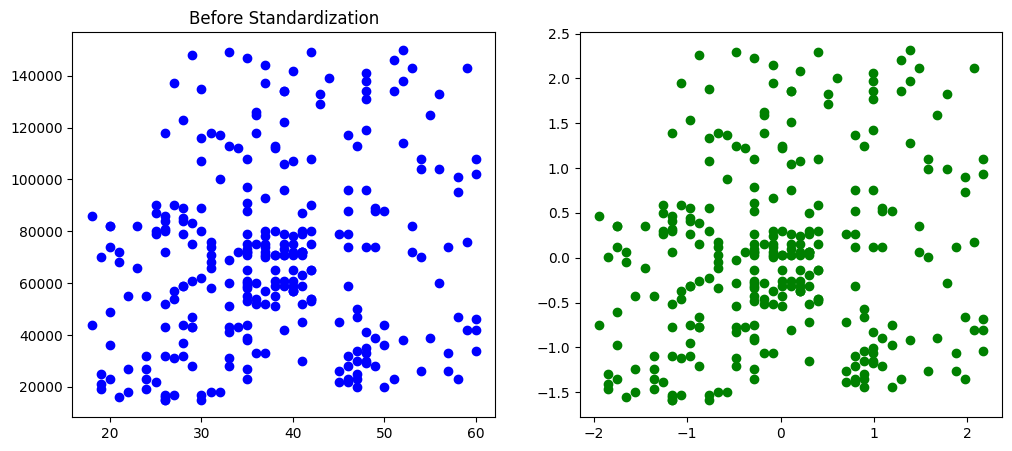

In [53]:
fig , (ax1 , ax2) = plt.subplots( ncols=2 , figsize = (12 , 5))

ax1.scatter( x_train['Age'] , x_train['EstimatedSalary'] , color = 'blue' )
ax1.set_title('Before Standardization')
ax2.scatter( x_train_scale['Age'] , x_train_scale['EstimatedSalary'] , color = 'green' )
plt.show()

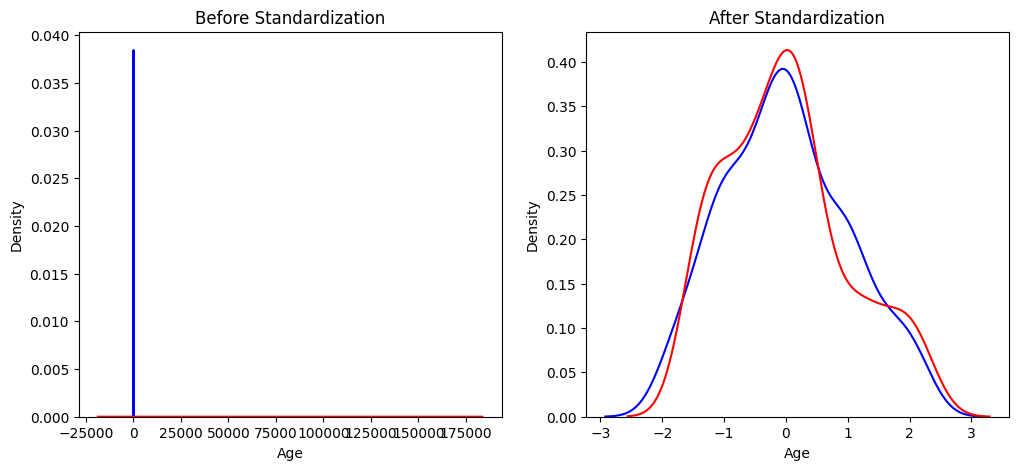

In [56]:
fig , ( ax1 , ax2 ) = plt.subplots ( ncols=2 , figsize=(12 , 5))

# before scalling
ax1.set_title('Before Standardization')
sns.kdeplot( x_train['Age'] , ax = ax1 , color = 'blue' )
sns.kdeplot( x_train['EstimatedSalary'] , ax = ax1 , color = 'red' )


# after scalling
ax2.set_title('After Standardization')
sns.kdeplot( x_train_scale['Age'] , ax = ax2 , color = 'blue' )
sns.kdeplot( x_train_scale['EstimatedSalary'] , ax = ax2 , color = 'red' )

plt.show()

## Comparision Distribution

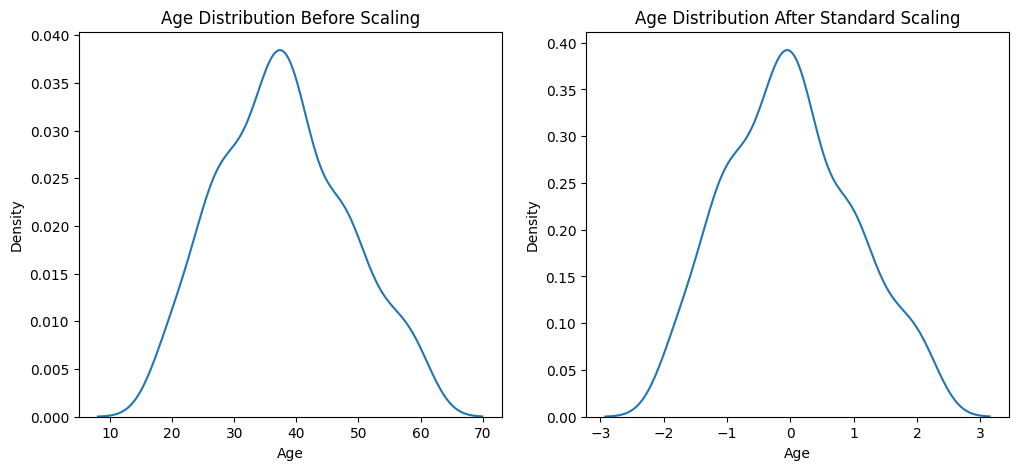

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scale['Age'], ax=ax2)
plt.show()

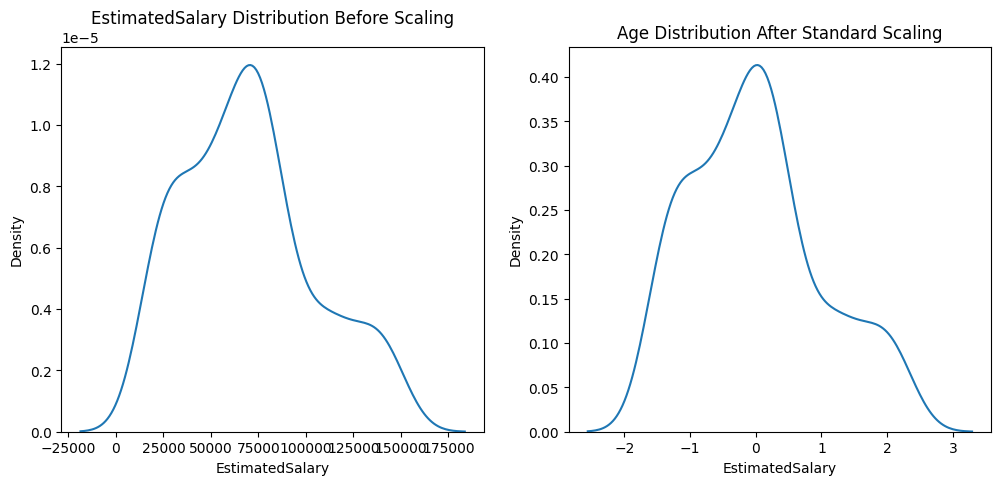

In [58]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('EstimatedSalary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scale['EstimatedSalary'], ax=ax2)
plt.show()